a00 is 0.0
a01 is 1.0
a10 is 3.0
a11 is 3.0
sino00 is 3.0
sino01 is 6.0
sino10 is 4.0
sino11 is 1.0


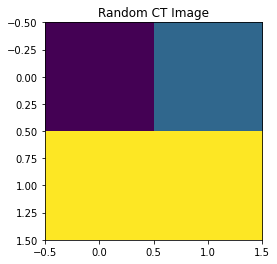

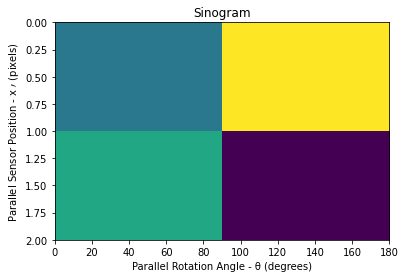

In [8]:
# two line intersection, two dimenstional linear system

# a1*x + b1*y = c1
# a2*x + b2*y = c2
import numpy as np
import random, math
import copy
import matplotlib.pyplot as plt
import cv2

## binary CT image with 2 by 2
# for 2 by 2 CT image reconstruction, we need 2 projections
# CT image      projection with 0 degree    90degree
# a00 a01       sino00 = a00+a10            sino01 = a10+a11
# a10 a11       sino10 = a01+a11            sino11 = a00+a01

a = np.zeros((2,2))
sino = np.zeros((2,2))

rd_min = 0
rd_max = 3

# we make an image 'a' to make a sinogram 'sino'.
# our assumption is we don't know a cross sectional area 'a'
a[0][0] = random.randint(rd_min, rd_max)
a[0][1] = random.randint(rd_min, rd_max)
a[1][0] = random.randint(rd_min, rd_max)
a[1][1] = random.randint(rd_min, rd_max)

# variables are x and y
sino[0][0] = a[0][0]+a[1][0]
sino[1][0] = a[0][1]+a[1][1]
sino[0][1] = a[1][0]+a[1][1]
sino[1][1] = a[0][0]+a[0][1]

print('a00 is',a[0][0])
print('a01 is',a[0][1])
print('a10 is',a[1][0])
print('a11 is',a[1][1])
print('sino00 is',sino[0][0])
print('sino01 is',sino[0][1])
print('sino10 is',sino[1][0])
print('sino11 is',sino[1][1])

plt.figure()           
plt.title('Random CT Image')
plt.imshow(a, vmin=rd_min, vmax=rd_max)
plt.show()

plt.figure()
plt.title('Sinogram')
plt.xlabel('Parallel Rotation Angle - \u03B8 (degrees)')
plt.ylabel('Parallel Sensor Position - x $\prime$ (pixels)')
plt.imshow(sino, aspect='auto', extent=[0,180,2,0])
plt.show()

# Assumption is we don't know array 'a'

In [11]:
# Assumption is we don't know array 'a'
# CT image with qubit variables
# Our goal is comparing two X-rays: 1) sino, 2) Radon transform
# q1 q2
# q3 q4

#q1 + q3 = sino[0][0]
#q2 + q4 = sino[1][0]
#q3 + q4 = sino[0][1]
#q1 + q2 = sino[1][1]
# need 3 more equation

In [11]:
q1 = 1 - 2*sino[0][0] + 1 - 2*sino[1][1]   # coefficient of q1 (linear term)
q2 = 4 - 4*sino[0][0] + 4 - 4*sino[1][1]
q3 = 1 - 2*sino[1][1] + 1 - 2*sino[1][0]
q4 = 4 - 4*sino[1][1] + 4 - 4*sino[1][0]
q5 = 1 - 2*sino[0][0] + 1 - 2*sino[0][1]
q6 = 4 - 4*sino[0][0] + 4 - 4*sino[0][1]
q7 = 1 - 2*sino[1][0] + 1 - 2*sino[0][1]
q8 = 4 - 4*sino[1][0] + 4 - 4*sino[0][1]
q1q2 = 4 + 4  # coefficient of q1q2 (quadratic term)
q1q3 = 2 
q1q4 = 4
q1q5 = 2
q1q6 = 4
q2q4 = 8
q2q3 = 4
q2q5 = 4
q2q6 = 8
q3q4 = 4 + 4
q3q7 = 2
q3q8 = 4
q4q7 = 4
q4q8 = 8
q5q6 = 4 + 4
q5q7 = 2
q5q8 = 4
q6q7 = 4
q6q8 = 8
q7q8 = 4 + 4

print('q1 is',q1)
print('q2 is',q2)
print('q3 is',q3)
print('q4 is',q4)
print('q5 is',q5)
print('q6 is',q6)
print('q7 is',q7)
print('q8 is',q8)
print('q1q2 is',q1q2)
print('q1q3 is',q1q3)
print('q1q4 is',q1q4)
print('q1q5 is',q1q5)
print('q1q6 is',q1q6)
print('q2q3 is',q2q3)
print('q2q4 is',q2q4)
print('q2q5 is',q2q5)
print('q2q6 is',q2q6)
print('q3q4 is',q3q4)
print('q3q7 is',q3q7)
print('q3q8 is',q3q8)
print('q4q7 is',q4q7)
print('q4q8 is',q4q8)
print('q5q6 is',q5q6)
print('q5q7 is',q5q7)
print('q5q8 is',q5q8)
print('q6q7 is',q6q7)
print('q6q8 is',q6q8)
print('q7q8 is',q7q8)

print('sino00 is',sino[0][0])
print('sino01 is',sino[0][1])
print('sino10 is',sino[1][0])
print('sino11 is',sino[1][1])

LE = -(sino[0][0]*sino[0][0] + sino[1][0]*sino[1][0] + sino[0][1]*sino[0][1] + sino[1][1]*sino[1][1])
print('The lowest energy is',LE)

q1 is -6.0
q2 is -8.0
q3 is -8.0
q4 is -12.0
q5 is -16.0
q6 is -28.0
q7 is -18.0
q8 is -32.0
q1q2 is 8
q1q3 is 2
q1q4 is 4
q1q5 is 2
q1q6 is 4
q2q3 is 4
q2q4 is 8
q2q5 is 4
q2q6 is 8
q3q4 is 8
q3q7 is 2
q3q8 is 4
q4q7 is 4
q4q8 is 8
q5q6 is 8
q5q7 is 2
q5q8 is 4
q6q7 is 4
q6q8 is 8
q7q8 is 8
sino00 is 3.0
sino01 is 6.0
sino10 is 4.0
sino11 is 1.0
The lowest energy is -62.0


In [12]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

linear = {('q1','q1'):-6, ('q2','q2'):-8, ('q3','q3'):-8, ('q4','q4'):-12, ('q5','q5'):-16, ('q6','q6'):-28, ('q7','q7'):-18, ('q8','q8'):-32}
quadratic = {('q1','q2'):8,('q1','q3'):2,('q1','q4'):4,('q1','q5'):2,('q1','q6'):4,('q2','q3'):4,('q2','q4'):8,('q2','q5'):4,('q2','q6'):8,('q3','q4'):8,('q3','q7'):2,('q3','q8'):4,('q4','q7'):4,('q4','q8'):8,('q5','q6'):8,('q5','q7'):2,('q5','q8'):4,('q6','q7'):4,('q6','q8'):8,('q7','q8'):8}

Q = dict(linear)
Q.update(quadratic)

sampleset = sampler_auto.sample_qubo(Q, num_reads=100)
print(sampleset)

   q1 q2 q3 q4 q5 q6 q7 q8 energy num_oc. chain_.
0   0  0  1  0  1  1  1  1  -62.0      52     0.0
1   0  0  0  1  1  1  0  1  -60.0       4     0.0
2   1  0  0  0  0  1  1  1  -60.0       4     0.0
3   1  0  0  0  1  1  1  1  -60.0       6     0.0
4   0  0  0  1  1  1  1  1  -60.0      11     0.0
5   1  0  1  0  1  1  1  1  -60.0       5     0.0
6   1  0  1  0  0  1  1  1  -60.0       3     0.0
7   0  0  1  0  1  1  0  1  -60.0       2     0.0
8   0  0  0  0  1  1  1  1  -60.0       9     0.0
9   0  0  0  1  1  1  1  1  -60.0       2   0.125
10  0  1  0  0  0  1  1  1  -58.0       1     0.0
11  0  0  0  0  0  1  1  1  -58.0       1     0.0
['BINARY', 12 rows, 100 samples, 8 variables]


0.0


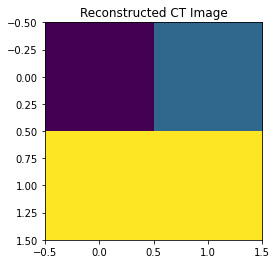

In [13]:
CT = np.zeros((2,2))
CT[0][0] = 0
CT[0][1] = 1
CT[1][0] = 3
CT[1][1] = 3
print (CT[0][0])
plt.figure()           
plt.title('Reconstructed CT Image')
plt.imshow(CT, vmin=rd_min, vmax=rd_max)
plt.show()

a00 is 1.0
a01 is 1.0
a10 is 0.0
a11 is 0.0


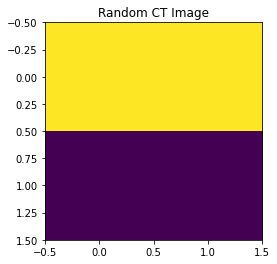

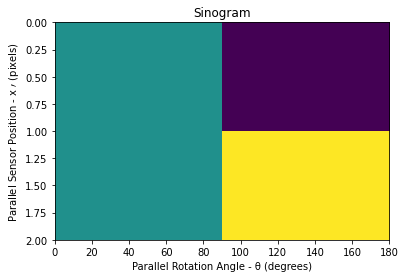

In [13]:
# two line intersection, two dimenstional linear system

# a1*x + b1*y = c1
# a2*x + b2*y = c2
import numpy as np
import random, math
import copy
import matplotlib.pyplot as plt
import cv2

## binary CT image with 2 by 2
# for 2 by 2 CT image reconstruction, we need 2 projections
# CT image      projection with 0 degree    90degree
# a00 a01       sino00 = a00+a10            sino01 = a10+a11
# a10 a11       sino10 = a01+a11            sino11 = a00+a01

a = np.zeros((2,2))
sino = np.zeros((2,2))

# we make an image 'a' to make a sinogram 'sino'.
# our assumption is we don't know a cross sectional area 'a'
a[0][0] = random.randint(0, 1)
a[0][1] = random.randint(0, 1)
a[1][0] = random.randint(0, 1)
a[1][1] = random.randint(0, 1)

# variables are x and y
sino[0][0] = a[0][0]+a[1][0]
sino[1][0] = a[0][1]+a[1][1]
sino[0][1] = a[1][0]+a[1][1]
sino[1][1] = a[0][0]+a[0][1]

print('a00 is',a[0][0])
print('a01 is',a[0][1])
print('a10 is',a[1][0])
print('a11 is',a[1][1])

print('sino00 is',sino[0][0])
print('sino01 is',sino[0][1])
print('sino10 is',sino[1][0])
print('sino11 is',sino[1][1])

plt.figure()           
plt.title('Random CT Image')
plt.imshow(a, vmin=0, vmax=1)
plt.show()

plt.figure()
plt.title('Sinogram')
plt.xlabel('Parallel Rotation Angle - \u03B8 (degrees)')
plt.ylabel('Parallel Sensor Position - x $\prime$ (pixels)')
plt.imshow(sino, aspect='auto', extent=[0,180,2,0])
plt.show()

# Assumption is we don't know array 'a'

In [14]:
q1 = 1 - 2*sino[0][0] + 1 - 2*sino[1][1]   # coefficient of q1 (linear term)
q2 = 1 - 2*sino[1][0] + 1 - 2*sino[1][1]
q3 = 1 - 2*sino[0][0] + 1 - 2*sino[0][1]
q4 = 1 - 2*sino[1][0] + 1 - 2*sino[0][1]
q1q2 = 2    # coefficient of q1q2 (quadratic term)
q1q3 = 2 
q2q4 = 2
q3q4 = 2

print('q1 is',q1)
print('q2 is',q2)
print('q3 is',q3)
print('q4 is',q4)
print('q1q2 is',q1q2)
print('q1q3 is',q1q3)
print('q2q4 is',q2q4)
print('q3q4 is',q3q4)

q1 is -4.0
q2 is -4.0
q3 is 0.0
q4 is 0.0
q1q2 is 2
q1q3 is 2
q2q4 is 2
q3q4 is 2


In [15]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

linear = {('q1','q1'):-4, ('q2','q2'):-4, ('q3','q3'):0, ('q4','q4'):0}
quadratic = {('q1','q2'):2,('q1','q3'):2,('q2','q4'):2,('q3','q4'):2}

Q = dict(linear)
Q.update(quadratic)

sampleset = sampler_auto.sample_qubo(Q, num_reads=100)
print(sampleset)

  q1 q2 q3 q4 energy num_oc. chain_.
0  1  1  0  0   -6.0     100     0.0
['BINARY', 1 rows, 100 samples, 4 variables]


1.0


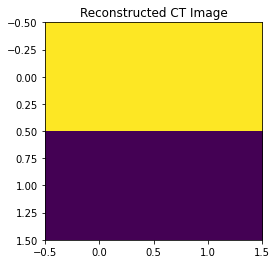

In [16]:
CT = np.zeros((2,2))
CT[0][0] = 1
CT[0][1] = 1
CT[1][0] = 0
CT[1][1] = 0
print (CT[0][0])
plt.figure()           
plt.title('Reconstructed CT Image')
plt.imshow(CT, vmin=0, vmax=1)
plt.show()